<a href="https://colab.research.google.com/github/gauthambrijesh/Car-price-prediction/blob/main/car_price_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
cardf = pd.read_csv('/content/Cleaned_Car_data.csv')

In [ ]:
cardf.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [ ]:
cardf.shape

(816, 7)

In [ ]:
cardf.columns

Index(['Unnamed: 0', 'name', 'company', 'year', 'Price', 'kms_driven',
       'fuel_type'],
      dtype='object')

In [ ]:
cardf.drop(labels=['name','Unnamed: 0'], axis=1, inplace = True)

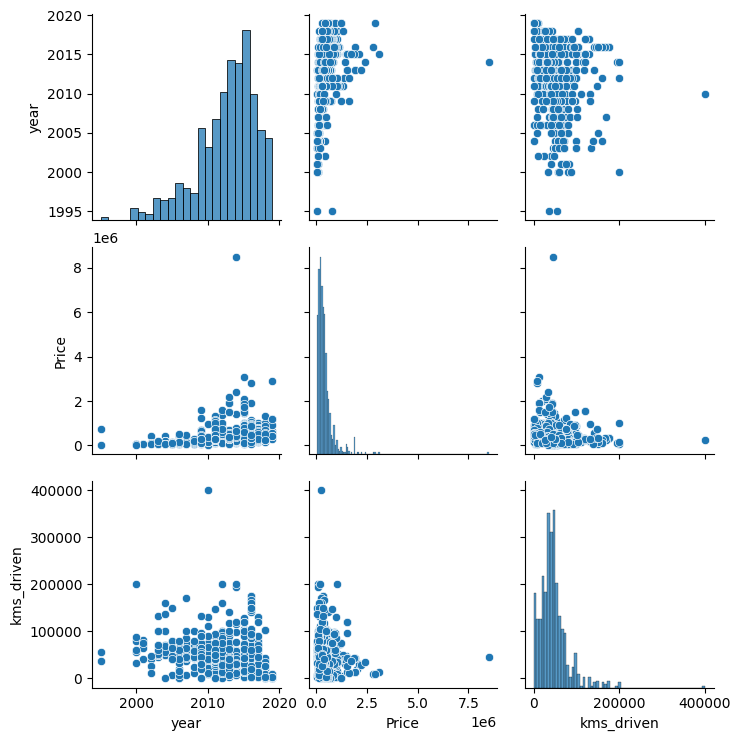

In [ ]:
sns.pairplot(cardf)

<ipython-input-14-88ea7fc407a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cardf.corr(), annot=True)


<Axes: >

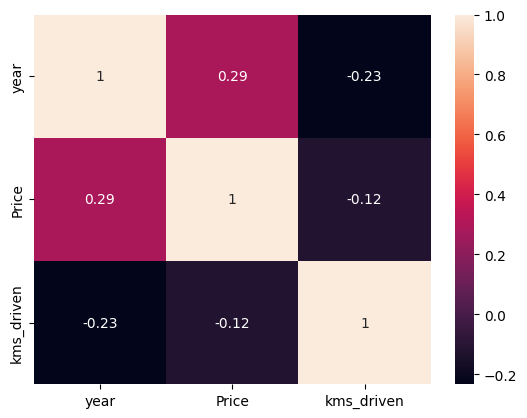

In [ ]:
sns.heatmap(cardf.corr(), annot=True)

In [ ]:
cardf_one = pd.get_dummies(data=cardf, drop_first=True)
cardf_one.head()

,year,Price,kms_driven,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Hindustan,...,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,575000,36000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,175000,41000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = cardf_one.drop('Price', axis = 1)

y = cardf_one['Price']

In [ ]:
X.head()

,year,kms_driven,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Hindustan,company_Honda,...,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_LPG,fuel_type_Petrol
0,2007,45000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,28000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,36000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,41000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0     80000
1    425000
2    325000
3    575000
4    175000
Name: Price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(816, 28) (489, 28) (327, 28)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(816,) (489,) (327,)


In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu' ),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear') 
])

In [ ]:
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/150
13/13 [==============================] - 0s 8ms/step - loss: 96700.5391 - mae: 96700.5391 - val_loss: 124699.7891 - val_mae: 124699.7891
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 97487.3594 - mae: 97487.3594 - val_loss: 138065.8438 - val_mae: 138065.8438
Epoch 3/150
13/13 [==============================] - 0s 6ms/step - loss: 97375.0000 - mae: 97375.0000 - val_loss: 129299.8750 - val_mae: 129299.8750
Epoch 4/150
13/13 [==============================] - 0s 6ms/step - loss: 99472.1953 - mae: 99472.1953 - val_loss: 130246.7734 - val_mae: 130246.7734
Epoch 5/150
13/13 [==============================] - 0s 6ms/step - loss: 96714.9375 - mae: 96714.9375 - val_loss: 130345.5391 - val_mae: 130345.5391
Epoch 6/150
13/13 [==============================] - 0s 6ms/step - loss: 96757.8594 - mae: 96757.8594 - val_loss: 132361.7500 - val_mae: 132361.7500
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 96414.9297 - mae: 96414.9297 - va

In [ ]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

16/16 [==============================] - 0s 2ms/step
[[ 392890.75 ]
 [ 204315.89 ]
 [  67477.53 ]
 [1591102.6  ]
 [ 547366.8  ]
 [ 867894.2  ]
 [ 157505.5  ]
 [ 115018.82 ]
 [ 320538.88 ]
 [ 762439.56 ]
 [2653222.   ]
 [1479085.4  ]
 [ 371805.25 ]
 [ 168613.1  ]
 [ 360354.97 ]
 [  78417.92 ]
 [ 296989.03 ]
 [ 243451.73 ]
 [ 197788.61 ]
 [ 700378.9  ]
 [1719117.4  ]
 [ 341104.7  ]
 [ 165857.34 ]
 [  54918.68 ]
 [ 233529.83 ]
 [ 170827.44 ]
 [ 290942.03 ]
 [ 617941.75 ]
 [ 330125.8  ]
 [ 123798.68 ]
 [ 269525.72 ]
 [ 335964.75 ]
 [ 484090.97 ]
 [ 295405.47 ]
 [ 243981.22 ]
 [  86519.43 ]
 [ 292291.7  ]
 [ 449738.75 ]
 [  77492.19 ]
 [ 292546.9  ]
 [ 119768.164]
 [ 475661.1  ]
 [ 124906.38 ]
 [ 252795.5  ]
 [ 312595.9  ]
 [ 131934.55 ]
 [ 700378.9  ]
 [ 304255.2  ]
 [ 266017.84 ]
 [ 380175.38 ]
 [ 333740.94 ]
 [ 251887.97 ]
 [  76252.18 ]
 [ 508871.94 ]
 [ 101591.59 ]
 [ 513497.7  ]
 [ 732759.75 ]
 [ 295673.03 ]
 [ 945247.   ]
 [ 423260.9  ]
 [ 449349.97 ]
 [ 245841.78 ]
 [ 315335.8  ]
 [

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

#r squared error
score_1 = r2_score(X_train_prediction, y_train)
print(100 - score_1)

score_2 =  mean_absolute_error(X_train_prediction, y_train)
score_2

99.5003511684041


99402.72677818252

In [ ]:
test_data_prediction = model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [ ]:
#r squared error
score_3 = r2_score(test_data_prediction, y_test)
print(100-score_3)

score_4 =  mean_absolute_error(test_data_prediction, y_test)
score_4

100.74361236232802


178813.72634747706

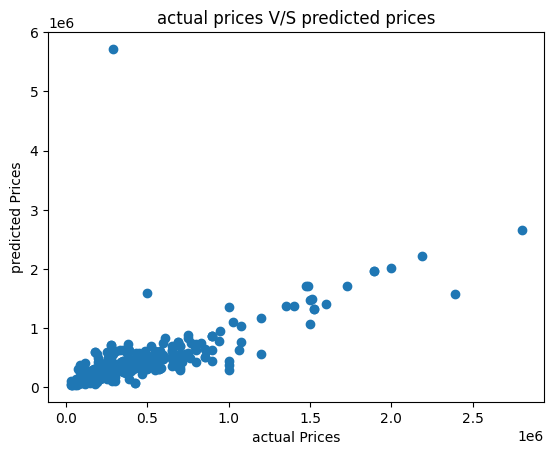

In [ ]:
plt.scatter(y_train, X_train_prediction)
plt.xlabel("actual Prices")
plt.ylabel("predicted Prices")
plt.title("actual prices V/S predicted prices")
plt.show()

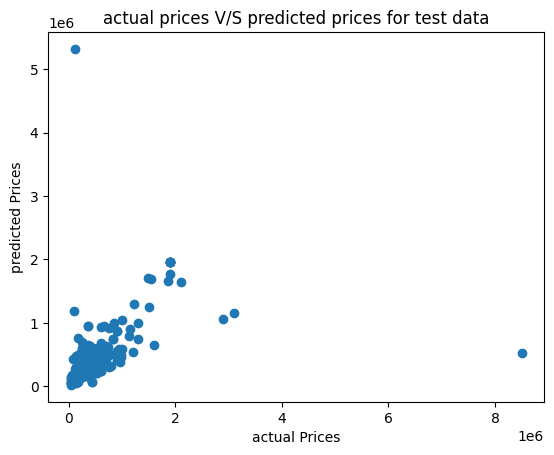

In [ ]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("actual Prices")
plt.ylabel("predicted Prices")
plt.title("actual prices V/S predicted prices for test data")
plt.show()